<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
#import piplite
#await piplite.install(['pandas'])
#await piplite.install(['numpy'])


In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [5]:
#from pyodide.http import pyfetch

#async def download(url, filename):
#    response = await pyfetch(url)
#    if response.status == 200:
#        with open(filename, "wb") as f:
#            f.write(await response.bytes())

In [6]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [ ]:
#await download(path, "Weather_Data.csv")
#filename ="Weather_Data.csv"

In [7]:
df = pd.read_csv(path)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [14]:
df.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [21]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [23]:
df_sydney_processed.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'RainToday_No', 'RainToday_Yes',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [24]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [38]:
df_sydney_processed['RainTomorrow'].value_counts()

RainTomorrow
0    2422
1     849
Name: count, dtype: int64

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [40]:
#date column is not needed
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [43]:
#checking datatypes again
df_sydney_processed.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('bool')], dtype=object)

In [44]:
#algorithms can't process bool, changing everything to float
df_sydney_processed = df_sydney_processed.astype(float)

In [45]:
#confirming change
df_sydney_processed.dtypes.unique()

array([dtype('float64')], dtype=object)

In [46]:
#get features columns (all columns in dataframe except the target)
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)

#get target column
Y = df_sydney_processed['RainTomorrow']

In [52]:
features.shape

(3271, 66)

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [48]:
#Enter Your Code, Execute and take the Screenshot
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

In [61]:
print(f'Size of train: {x_train.shape}')
print(f'Size of test: {x_test.shape}')

Size of train: (2616, 66)
Size of test: (655, 66)


#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [62]:
#Enter Your Code, Execute and take the Screenshot
#create model object
LinearReg = LinearRegression()

In [63]:
#train model
LinearReg.fit(x_train, y_train)

LinearRegression()

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [64]:
#Enter Your Code, Execute and take the Screenshot
#make predictions with model
predictions = LinearReg.predict(x_test)

In [76]:
predictions[:10]

array([0.13178253, 0.27615356, 0.97808838, 0.28748322, 0.13237762,
       0.46046448, 0.35677338, 0.85646057, 0.67501068, 0.03827667])

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [81]:
#Enter Your Code, Execute and take the Screenshot
#calculate all 3 error types
LinearRegression_MAE = metrics.mean_absolute_error(y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test, predictions)
LinearRegression_R2 = metrics.r2_score(y_test, predictions)

In [84]:
#print results
print(f'Mean Absolute Error of the model: {LinearRegression_MAE}')
print(f'Mean Squared Error of the model: {LinearRegression_MSE}')
print(f'R^2 of the model: {LinearRegression_R2}')

Mean Absolute Error of the model: 0.25631900234076815
Mean Squared Error of the model: 0.11572291759564364
R^2 of the model: 0.4271205492306953


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [112]:
#Enter Your Code, Execute and take the Screenshot
#create Dictionary for dataframe
report_dict = {'MAE':round(LinearRegression_MAE, 3),
              'MSE':round(LinearRegression_MSE, 3),
               'R^2':round(LinearRegression_R2, 3)
              }

In [113]:
#create dataframe
Report = pd.DataFrame.from_dict(report_dict, orient='index').T

In [114]:
#set index
Report.index = ['Linear Regression Model']

#view dataframe
Report

,MAE,MSE,R^2
Linear Regression Model,0.256,0.116,0.427


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [115]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
#create model object
KNN = KNeighborsClassifier(n_neighbors=4)

In [116]:
#train model
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [117]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
#make predictions with model
predictions = KNN.predict(x_test)

In [118]:
predictions[:10]

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 0.])

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [130]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
#calculate all 3 accuracy types
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

In [131]:
#print results
print(f'KNN Accuracy Score of the model: {round(KNN_Accuracy_Score, 3)}')
print(f'KNN Jaccard Index of the model: {round(KNN_JaccardIndex, 3)}')
print(f'KNN F1 Score of the model: {round(KNN_F1_Score, 3)}')

KNN Accuracy Score of the model: 0.818
KNN Jaccard Index of the model: 0.425
KNN F1 Score of the model: 0.597


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [162]:
#Enter Your Code, Execute and take the Screenshot
#create model object
#note: after re-training the model and manually changing the values for max_depth, 6 returned the best results
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=6) 

In [163]:
#train model
Tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [164]:
#Enter Your Code, Execute and take the Screenshot
#make predictions with model
predictions = Tree.predict(x_test)

In [165]:
predictions[:10]

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 0.])

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [166]:
#Enter Your Code, Execute and take the Screenshot
#calculate all 3 accuracy types
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

In [167]:
#print results
print(f'Decision Tree Accuracy Score of the model: {round(Tree_Accuracy_Score, 3)}')
print(f'Decision Tree Jaccard Index of the model: {round(Tree_JaccardIndex, 3)}')
print(f'Decision Tree F1 Score of the model: {round(Tree_F1_Score, 3)}')

Decision Tree Accuracy Score of the model: 0.826
Decision Tree Jaccard Index of the model: 0.496
Decision Tree F1 Score of the model: 0.663


### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [169]:
#Enter Your Code, Execute and take the Screenshot
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [170]:
print(f'Size of train: {x_train.shape}')
print(f'Size of test: {x_test.shape}')

Size of train: (2616, 66)
Size of test: (655, 66)


#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [171]:
#Enter Your Code, Execute and take the Screenshot
#create model object
LR = LogisticRegression(solver='liblinear')

In [172]:
#train model
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [194]:
#make predictions with model
predictions = LR.predict(x_test)

In [195]:
predictions[:10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [196]:
#view each prediction's probability for that prediction value
predict_proba = LR.predict_proba(x_test)

In [197]:
predict_proba[:10]

array([[0.74339483, 0.25660517],
       [0.97495683, 0.02504317],
       [0.50982014, 0.49017986],
       [0.84891209, 0.15108791],
       [0.9684643 , 0.0315357 ],
       [0.06544719, 0.93455281],
       [0.70923101, 0.29076899],
       [0.96325342, 0.03674658],
       [0.92551162, 0.07448838],
       [0.93422441, 0.06577559]])

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [198]:
#Enter Your Code, Execute and take the Screenshot
#calculate the model metrics
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, predict_proba)

In [199]:
#print results
print(f'Logistic Regression Accuracy Score of the model: {round(LR_Accuracy_Score, 3)}')
print(f'Logistic Regression Jaccard Index of the model: {round(LR_JaccardIndex, 3)}')
print(f'Logistic Regression F1 Score of the model: {round(LR_F1_Score, 3)}')
print(f'Logistic Regression Log Loss of the model: {round(LR_Log_Loss, 3)} (lower Log Loss value is better)')

Logistic Regression Accuracy Score of the model: 0.837
Logistic Regression Jaccard Index of the model: 0.509
Logistic Regression F1 Score of the model: 0.675
Logistic Regression Log Loss of the model: 0.381 (lower Log Loss value is better)


### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [186]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
#create model object
SVM = svm.SVC()

In [187]:
#train model
SVM.fit(x_train, y_train)

SVC()

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [189]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
#make predictions with model
predictions = SVM.predict(x_test)

In [188]:
predictions[:10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [200]:
#calculate the model metrics
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)

In [201]:
#print results
print(f'SVM Accuracy Score of the model: {round(SVM_Accuracy_Score, 3)}')
print(f'SVM Jaccard Index of the model: {round(SVM_JaccardIndex, 3)}')
print(f'SVM F1 Score of the model: {round(SVM_F1_Score, 3)}')

SVM Accuracy Score of the model: 0.837
SVM Jaccard Index of the model: 0.509
SVM F1 Score of the model: 0.675


### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [316]:
#create Dict for dataframe
full_report_dict = {'Classification Algorithm':['KNN', 'Decision Tree', 'Logistic Regression','SVM'],
                    'Accuracy Score':[KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
                    'Jaccard Index':[KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex,],
                    'F1-Score':[KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
                    'LogLoss': ['N/A', 'N/A', LR_Log_Loss, 'N/A']}

In [317]:
#create datafram
Report  = pd.DataFrame.from_dict(full_report_dict, orient='index').T

In [318]:
#reset index to algo
Report.set_index('Classification Algorithm', inplace=True)

In [319]:
Report

,Accuracy Score,Jaccard Index,F1-Score,LogLoss
Classification Algorithm,,,,
KNN,0.818321,0.425121,0.59661,N/A
Decision Tree,0.825954,0.495575,0.662722,N/A
Logistic Regression,0.836641,0.509174,0.674772,0.381064
SVM,0.836641,0.509174,0.674772,N/A


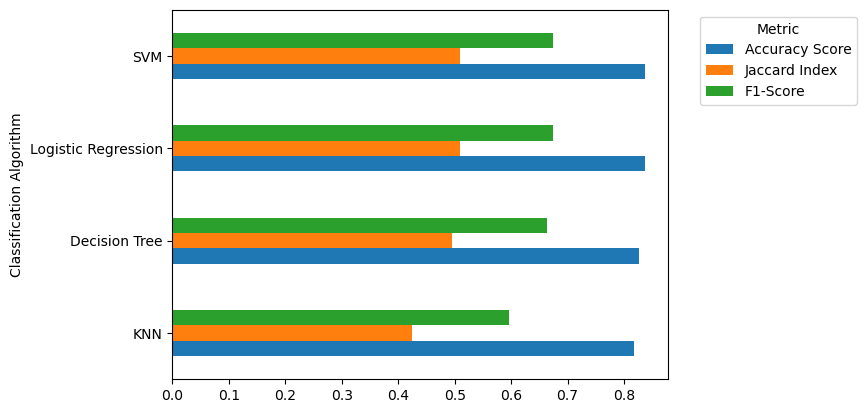

In [315]:
import matplotlib.pyplot as plt

ax = Report.plot(kind='barh')
ax.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
